In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

In [44]:
df = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
print("Initial data shape:", df.shape)

Initial data shape: (1470, 35)


# Data Cleaning

In [45]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [47]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [48]:
# Drop the constant columns 'EmployeeCount' and 'StandardHours'
df.drop(columns=['EmployeeCount', 'StandardHours','EmployeeNumber'], inplace=True)
print("Columns after dropping:", df.columns)


Columns after dropping: Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')


In [49]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [50]:
df.drop_duplicates(inplace=True)
print("After removing duplicates:", df.shape)

After removing duplicates: (1470, 32)


In [51]:
for col in df.select_dtypes(include=['object']).columns:
    try:
        df[col] = pd.to_numeric(df[col])
    except Exception as e:
        # If conversion fails, assume it is categorical
        pass

### Outlier Detection

#### IQR

Age: 0 potential outliers (lower_bound=10.50, upper_bound=62.50)


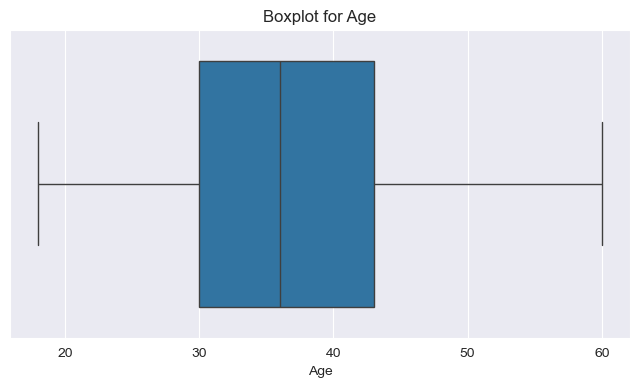

DailyRate: 0 potential outliers (lower_bound=-573.00, upper_bound=2195.00)


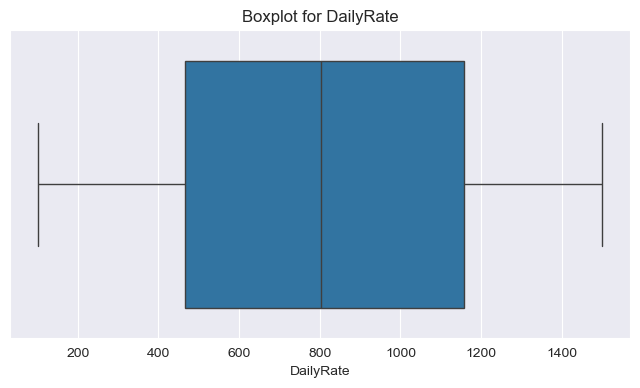

DistanceFromHome: 0 potential outliers (lower_bound=-16.00, upper_bound=32.00)


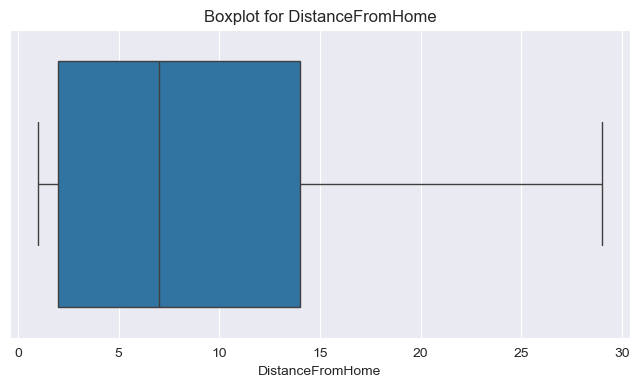

Education: 0 potential outliers (lower_bound=-1.00, upper_bound=7.00)


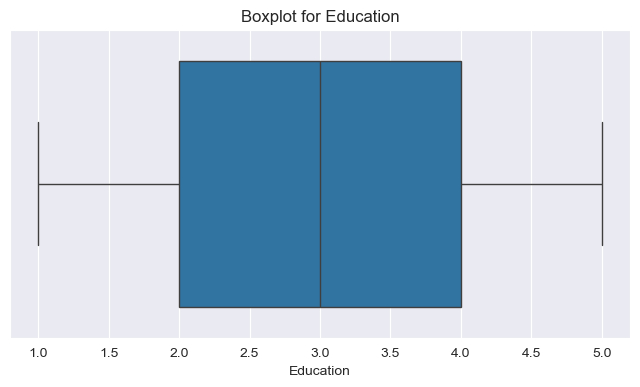

EnvironmentSatisfaction: 0 potential outliers (lower_bound=-1.00, upper_bound=7.00)


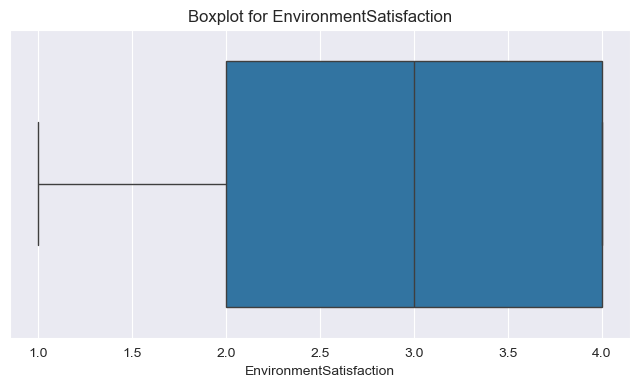

HourlyRate: 0 potential outliers (lower_bound=-5.62, upper_bound=137.38)


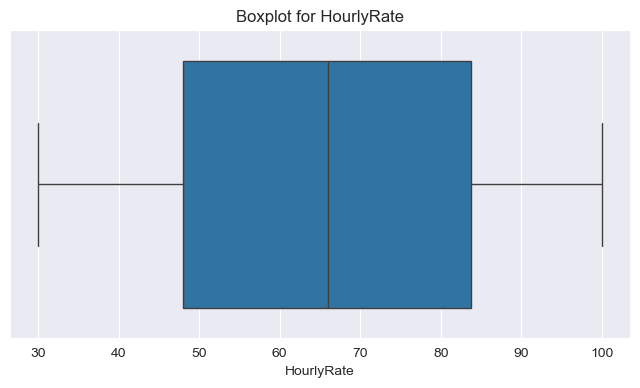

JobInvolvement: 0 potential outliers (lower_bound=0.50, upper_bound=4.50)


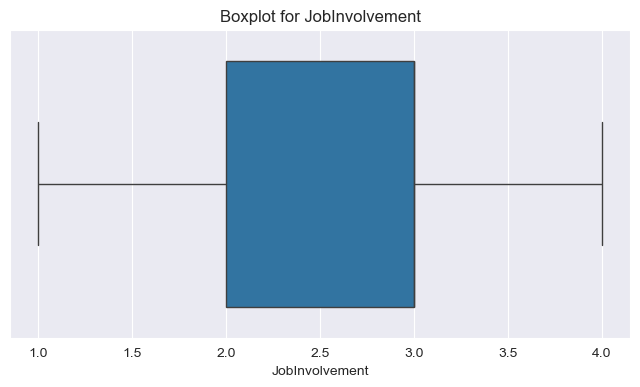

JobLevel: 0 potential outliers (lower_bound=-2.00, upper_bound=6.00)


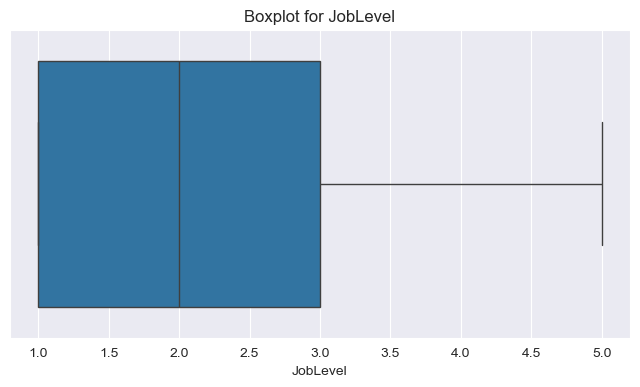

JobSatisfaction: 0 potential outliers (lower_bound=-1.00, upper_bound=7.00)


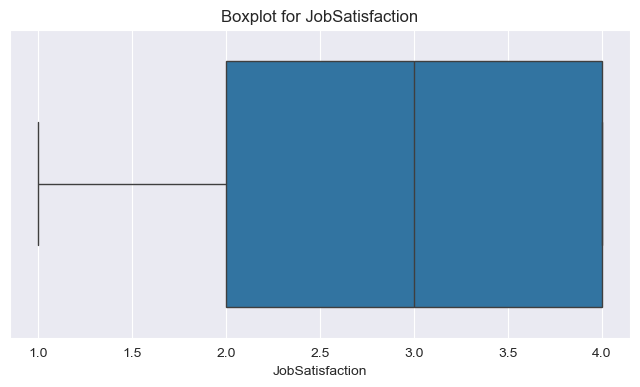

MonthlyIncome: 114 potential outliers (lower_bound=-5291.00, upper_bound=16581.00)


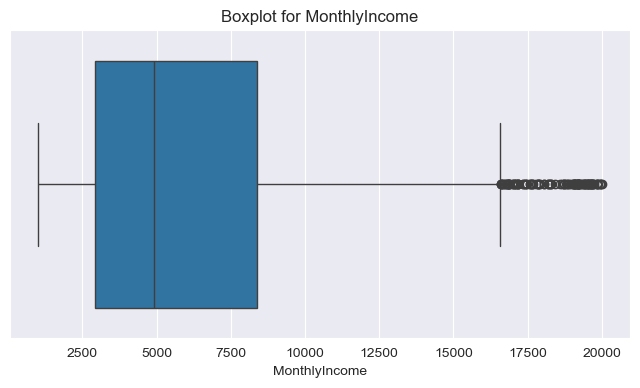

MonthlyRate: 0 potential outliers (lower_bound=-10574.75, upper_bound=39083.25)


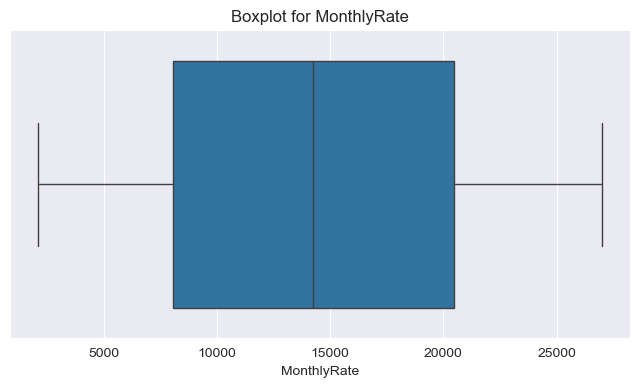

NumCompaniesWorked: 52 potential outliers (lower_bound=-3.50, upper_bound=8.50)


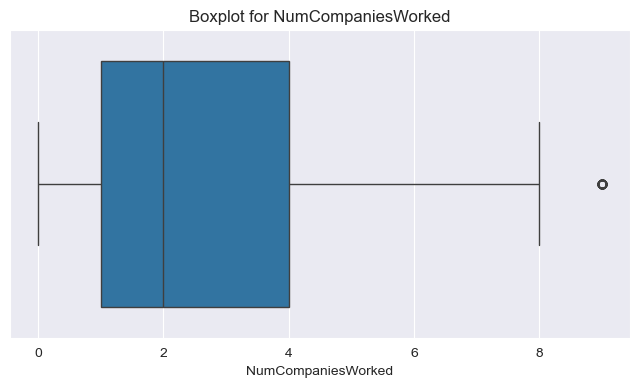

PercentSalaryHike: 0 potential outliers (lower_bound=3.00, upper_bound=27.00)


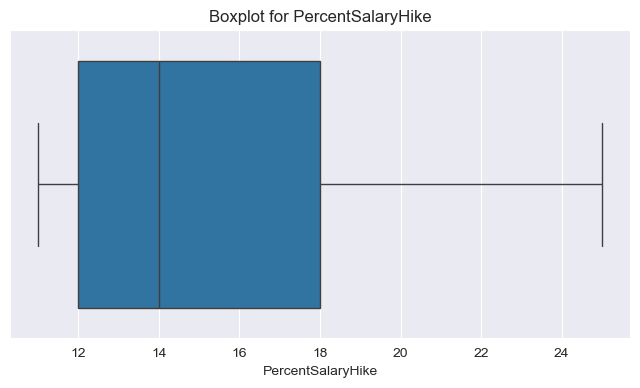

PerformanceRating: 226 potential outliers (lower_bound=3.00, upper_bound=3.00)


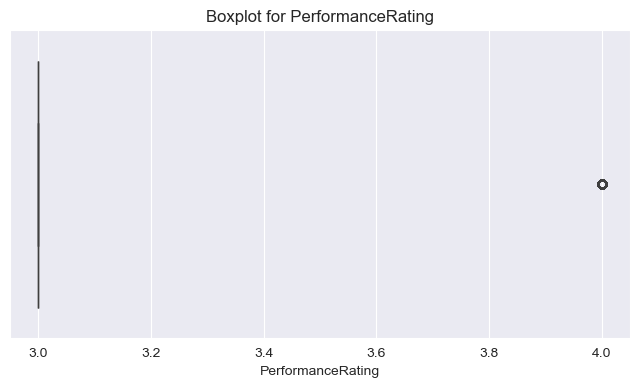

RelationshipSatisfaction: 0 potential outliers (lower_bound=-1.00, upper_bound=7.00)


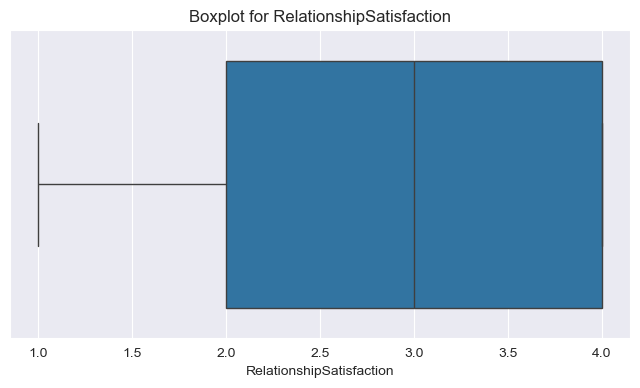

StockOptionLevel: 85 potential outliers (lower_bound=-1.50, upper_bound=2.50)


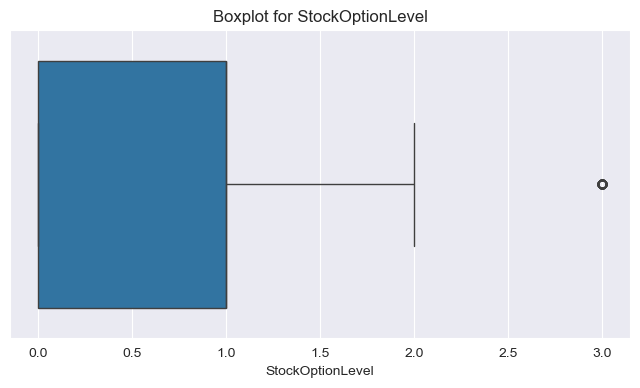

TotalWorkingYears: 63 potential outliers (lower_bound=-7.50, upper_bound=28.50)


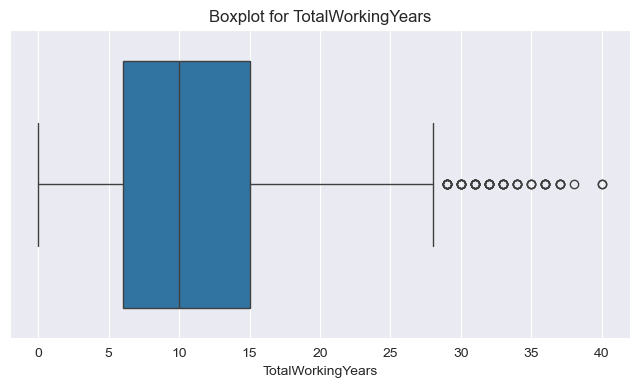

TrainingTimesLastYear: 238 potential outliers (lower_bound=0.50, upper_bound=4.50)


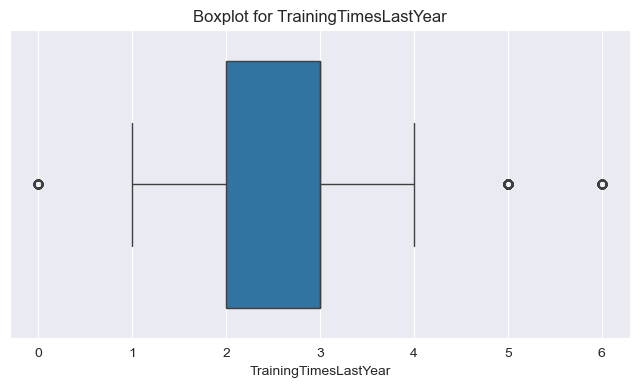

WorkLifeBalance: 0 potential outliers (lower_bound=0.50, upper_bound=4.50)


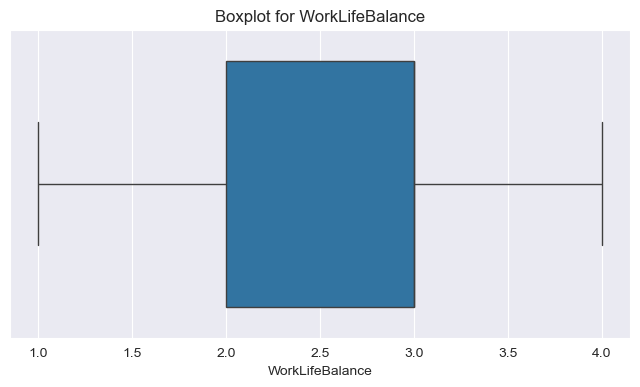

YearsAtCompany: 104 potential outliers (lower_bound=-6.00, upper_bound=18.00)


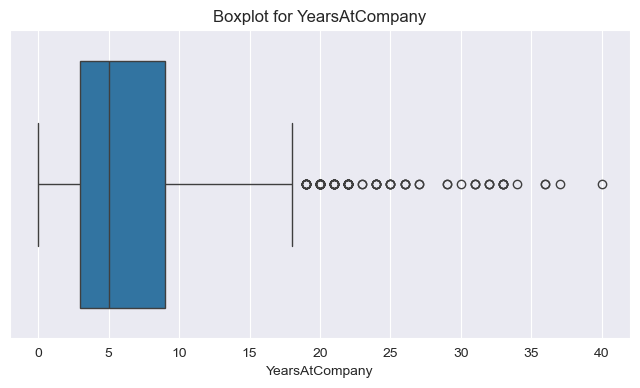

YearsInCurrentRole: 21 potential outliers (lower_bound=-5.50, upper_bound=14.50)


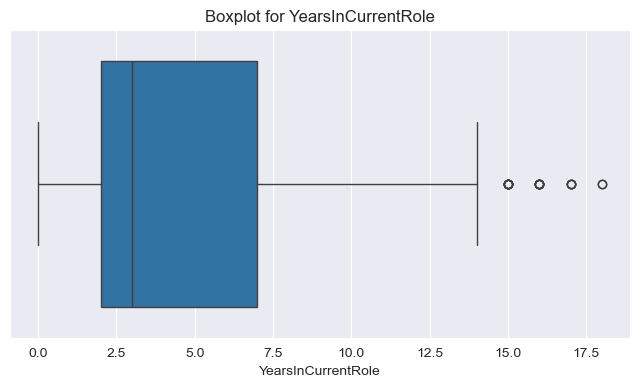

YearsSinceLastPromotion: 107 potential outliers (lower_bound=-4.50, upper_bound=7.50)


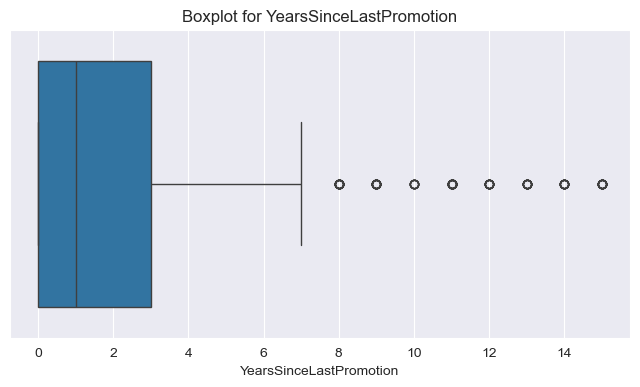

YearsWithCurrManager: 14 potential outliers (lower_bound=-5.50, upper_bound=14.50)


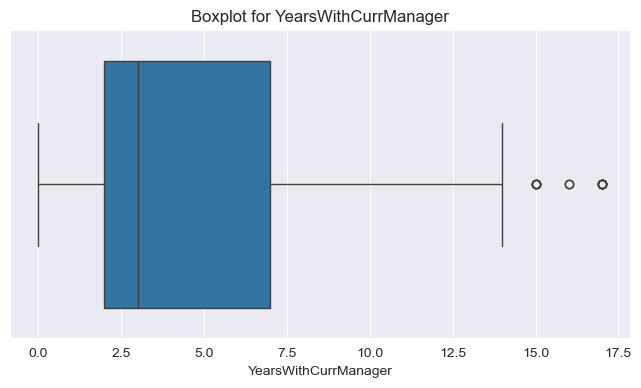

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identify numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Loop through each numerical column
for col in numerical_cols:
    # Calculate IQR for the column
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    outlier_count = df[(df[col] < lower_bound) | (df[col] > upper_bound)].shape[0]

    # Print the outlier information
    print(f"{col}: {outlier_count} potential outliers (lower_bound={lower_bound:.2f}, upper_bound={upper_bound:.2f})")

    # Plot the boxplot to visualize outliers
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot for {col}')
    plt.xlabel(col)
    plt.show()


#### Isolation Forest

In [53]:
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns

# Assume df is your DataFrame loaded with the employee data

# Select numerical features for outlier detection
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

# Initialize IsolationForest; adjust 'contamination' to reflect the expected proportion of outliers
iso_forest = IsolationForest(contamination=0.05, random_state=42)

# Fit the model and predict outliers; predictions: 1 for inliers, -1 for outliers
df['outlier_flag'] = iso_forest.fit_predict(df[numerical_cols])

# Count the detected outliers
n_outliers = (df['outlier_flag'] == -1).sum()
print(f"Total outliers detected: {n_outliers}")

# Optionally, view a summary for the outliers
display(df[df['outlier_flag'] == -1][numerical_cols])




Total outliers detected: 74


,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
45,41,1360,12,3,2,49,3,5,3,19545,...,3,4,0,23,0,3,22,15,15,8
62,50,989,7,2,2,43,2,5,3,18740,...,3,4,1,29,2,2,27,3,13,8
63,59,1435,25,3,1,99,3,3,1,7637,...,3,4,0,28,3,2,21,16,7,9
98,58,682,10,4,4,37,3,4,3,13872,...,3,3,0,38,1,2,37,10,1,8
105,59,1420,2,4,3,32,2,5,4,18844,...,4,4,1,30,3,3,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1414,47,1180,25,3,1,84,3,3,3,8633,...,4,2,0,25,3,3,17,14,12,11
1432,37,161,10,3,3,42,4,3,4,13744,...,4,1,1,16,2,3,16,11,6,8
1443,42,300,2,3,1,56,3,5,3,18880,...,3,1,0,24,2,2,22,6,4,14
1445,41,582,28,4,1,60,2,4,2,13570,...,4,3,1,21,3,3,20,7,0,10


**Outlier Results:**

We compared two methods for outlier detection on our employee attrition dataset. The univariate IQR method flagged hundreds of potential outliers by evaluating each feature independently, this method is sensitive to extreme values on a per-feature basis. In contrast, the multivariate Isolation Forest algorithm, which considers the overall structure and interactions among features, flagged only 75 potential outliers. This indicates that many values deemed extreme by the IQR method fall within a reasonable range when considering the full context of the data.

**Why we decided to keep outliers:**

In our employee attrition modeling context, retaining these outliers is crucial. Extreme values, such as unusually high monthly incomes or long tenures, might capture important, real-world variations that can influence attrition patterns. Removing outliers outright could lead us to lose valuable insights into employee behavior. Furthermore, our modeling approach, particularly if using robust methods like tree-based algorithms, is generally tolerant to these extreme values. Therefore, we decided to remove 0 outliers to preserve the complete spectrum of information, ensuring that our analysis fully reflects the underlying complexity of our workforce data.

In [54]:
df.drop(columns=['outlier_flag'], inplace=True)

# EDA

## Numerical Feature Distributions

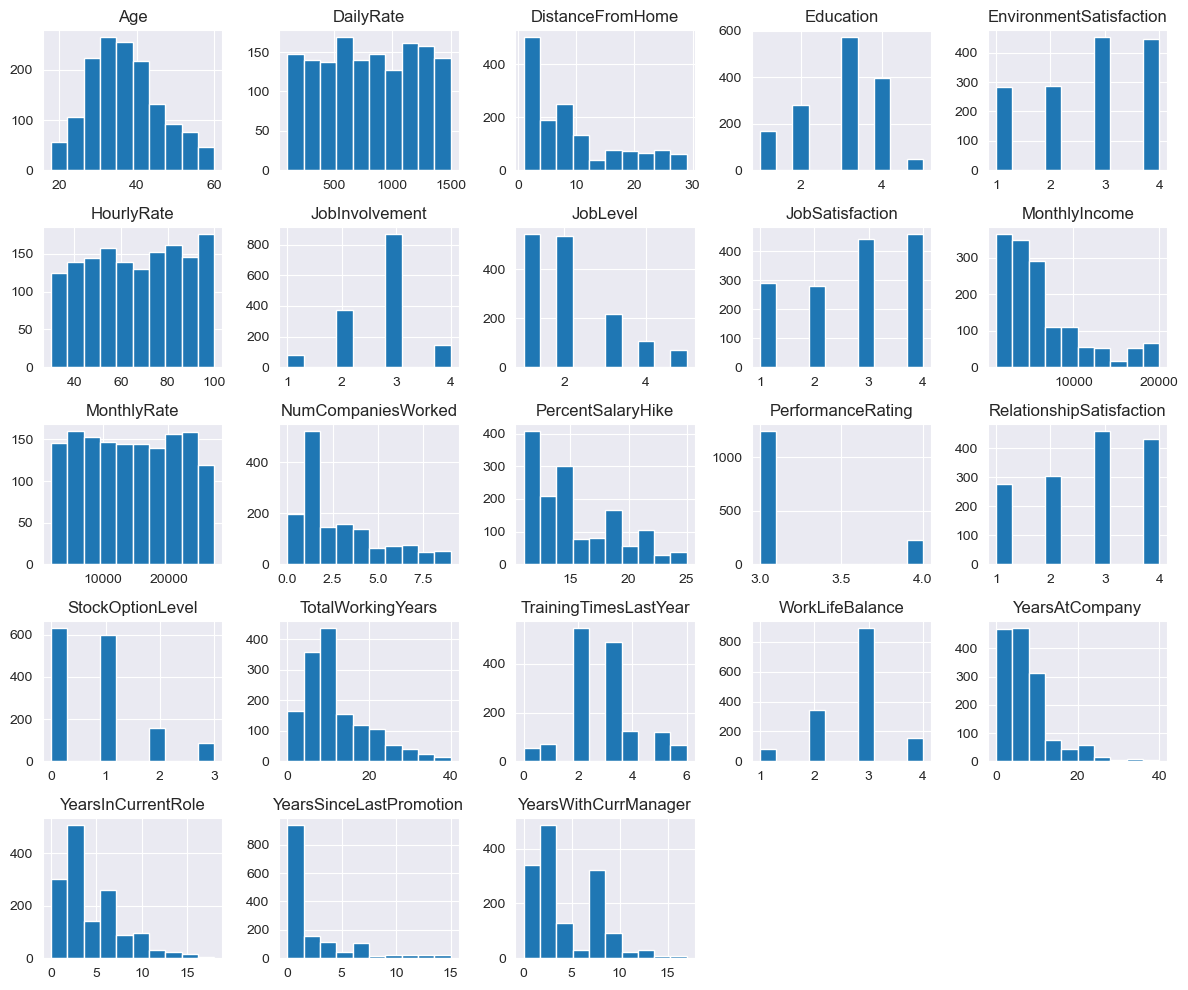

In [55]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(figsize=(12, 10))
plt.tight_layout()
plt.show()

## Correlation & Colinearity

### Correlation Matrix

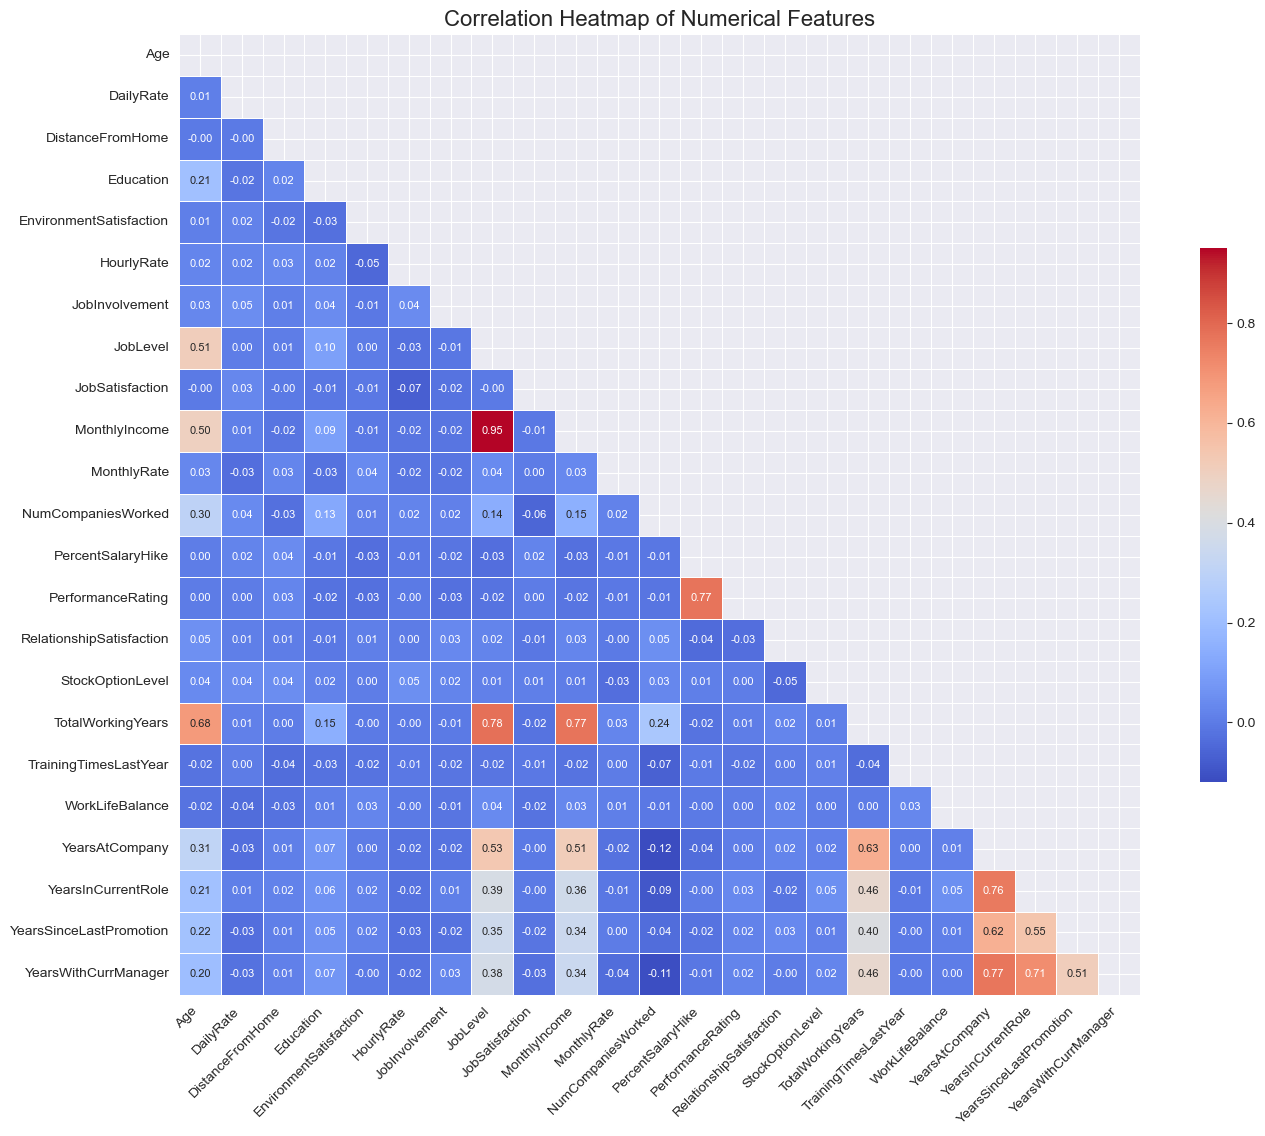

In [56]:
# Compute the correlation matrix for numerical features
corr_matrix = df[numeric_cols].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure for a larger plot
plt.figure(figsize=(14, 12))

# Draw the heatmap with the mask and custom formatting
sns.heatmap(
    corr_matrix,
    mask=mask,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot_kws={"size": 8}
)

plt.title("Correlation Heatmap of Numerical Features", fontsize=16)
plt.xticks(fontsize=10, rotation=45, ha="right")
plt.yticks(fontsize=10, rotation=0)
plt.tight_layout()
plt.show()

### Variance Inflation Factor

In [59]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Select only numerical features from the DataFrame
num_df = df.select_dtypes(include=['int64', 'float64']).dropna()

# Create a DataFrame to store VIF values
vif_data = pd.DataFrame()
vif_data['feature'] = num_df.columns
vif_data['VIF'] = [variance_inflation_factor(num_df.values, i) for i in range(num_df.shape[1])]

# Filter features with VIF > 10
high_vif_features = vif_data[vif_data['VIF'] > 10]
print("Features with VIF > 10:")
print(high_vif_features)


Features with VIF > 10:
              feature         VIF
0                 Age   33.155944
5          HourlyRate   11.107000
6      JobInvolvement   14.885028
7            JobLevel   49.657767
9       MonthlyIncome   31.318636
12  PercentSalaryHike   41.829000
13  PerformanceRating  114.724181
16  TotalWorkingYears   14.336803
18    WorkLifeBalance   15.310855
19     YearsAtCompany   10.559993


## Class Imbalance

/var/folders/pf/lrdbc3y970s_jrm37gglfy180000gn/T/ipykernel_49992/3383158462.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attrition_percentages.index, y=attrition_percentages.values, palette='viridis')


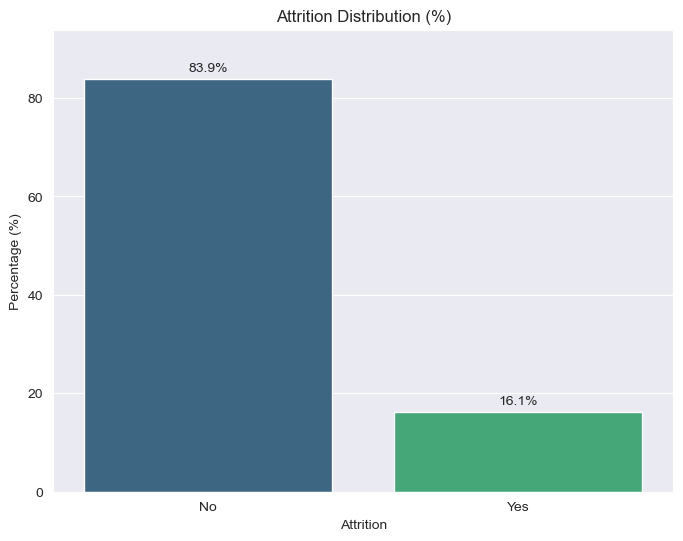

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the percentage for each category in the 'Attrition' column
attrition_percentages = df['Attrition'].value_counts(normalize=True) * 100

# Create the bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=attrition_percentages.index, y=attrition_percentages.values, palette='viridis')
plt.title('Attrition Distribution (%)')
plt.xlabel('Attrition')
plt.ylabel('Percentage (%)')

# Annotate the bars with percentage values
for i, pct in enumerate(attrition_percentages.values):
    plt.text(i, pct + 1, f"{pct:.1f}%", ha='center', va='bottom')

plt.ylim(0, attrition_percentages.values.max() + 10)
plt.show()



# Splitting the Data

In [61]:
from sklearn.model_selection import train_test_split

# Assume 'housing' is your DataFrame with the target variable "Attrition"
# Split the DataFrame into features (X) and target (y)
X = df.drop("Attrition", axis=1)
y = df["Attrition"]

# Perform stratified splitting to maintain the same class proportion in both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Display the shapes and target distribution in each set
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train distribution:\n", y_train.value_counts(normalize=True))
print("y_test distribution:\n", y_test.value_counts(normalize=True))

X_train shape: (1176, 31)
X_test shape: (294, 31)
y_train distribution:
 Attrition
No     0.838435
Yes    0.161565
Name: proportion, dtype: float64
y_test distribution:
 Attrition
No     0.840136
Yes    0.159864
Name: proportion, dtype: float64


# Feature Engineering

## Skewness and Log Transformation

In [91]:
# Step 1: Identify numerical features and calculate skewness
numerical_features = X_train.select_dtypes(include=["int64", "float64"]).columns
# Compute skewness for each numerical feature
skewness_series = X_train[numerical_features].apply(lambda x: skew(x.dropna()))
# Sort the skewness values for clarity
skewness_series = skewness_series.sort_values(ascending=False)

print("Skewness of numerical features:")
print(skewness_series)

ordinal_cols = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobLevel', 'JobSatisfaction', 'PerformanceRating',
    'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance'
]

# Step 2: Determine which features are highly skewed using a threshold (e.g., 0.75)
threshold = 0.75
# Create a list of feature names whose absolute skewness exceeds the threshold
highly_skewed_features = [feature for feature in skewness_series.index
                          if abs(skewness_series[feature]) > threshold and feature not in ordinal_cols]


print("\nFeatures to log transform:", highly_skewed_features)

Skewness of numerical features:
YearsSinceLastPromotion     1.968349
PerformanceRating           1.882402
YearsAtCompany              1.730686
MonthlyIncome               1.331249
TotalWorkingYears           1.102298
NumCompaniesWorked          0.997796
JobLevel                    0.978058
StockOptionLevel            0.968522
DistanceFromHome            0.927036
YearsInCurrentRole          0.871814
PercentSalaryHike           0.805633
YearsWithCurrManager        0.777045
TrainingTimesLastYear       0.613346
Age                         0.403172
MonthlyRate                 0.002710
DailyRate                  -0.004038
HourlyRate                 -0.010065
Education                  -0.296723
JobSatisfaction            -0.325564
RelationshipSatisfaction   -0.327549
EnvironmentSatisfaction    -0.328060
JobInvolvement             -0.520605
WorkLifeBalance            -0.569558
dtype: float64

Features to log transform: ['YearsSinceLastPromotion', 'YearsAtCompany', 'MonthlyIncome', 'TotalWorki

In [92]:
# Step 3: Apply log transformation to these features using np.log1p
X_train_log = X_train.copy()
for feature in highly_skewed_features:
    X_train_log[feature] = np.log1p(X_train_log[feature])

X_test_log = X_test.copy()
for feature in highly_skewed_features:
    X_test_log[feature] = np.log1p(X_test_log[feature])


# Optional: Verify the new skewness values after transformation
new_skewness = X_train_log[highly_skewed_features].apply(lambda x: skew(x.dropna()))
print("\nSkewness in train set after log transformation:")
print(new_skewness.sort_values(ascending=False))



Skewness in train set after log transformation:
YearsSinceLastPromotion    0.719406
PercentSalaryHike          0.499931
MonthlyIncome              0.251454
NumCompaniesWorked         0.076533
DistanceFromHome          -0.060397
YearsAtCompany            -0.225298
YearsWithCurrManager      -0.388767
YearsInCurrentRole        -0.403287
TotalWorkingYears         -0.633388
dtype: float64


## Scaling: Standardization

In [93]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns in the log-transformed datasets
numeric_cols = X_train_log.select_dtypes(include=["int64", "float64"]).columns


X_train_log_std = X_train_log.copy()
X_test_log_std = X_test_log.copy()

# Instantiate StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training numeric data and transform it
X_train_log_std[numeric_cols] = scaler.fit_transform(X_train_log[numeric_cols])

# Transform the test numeric data using the same scaler (without refitting)
X_test_log_std[numeric_cols] = scaler.transform(X_test_log[numeric_cols])

# Optional: Display the first few rows to verify the scaling
print("First five rows of standardized numerical features in X_train_log:")
print(X_train_log[numeric_cols].head())


First five rows of standardized numerical features in X_train_log:
      Age  DailyRate  DistanceFromHome  Education  EnvironmentSatisfaction  \
1194   47       1225          1.098612          4                        2   
128    22        594          1.098612          1                        3   
810    46        406          1.386294          1                        1   
478    25        622          2.639057          1                        2   
491    43       1001          2.302585          5                        4   

      HourlyRate  JobInvolvement  JobLevel  JobSatisfaction  MonthlyIncome  \
1194          47               4         4                2       9.678655   
128          100               3         1                4       7.833600   
810           52               3         4                3       9.768011   
478           40               3         1                3       7.648263   
491           72               3         2                3       8.644707

## Encoding Categoricals

In [97]:
# Encoding of Features and Target Variable

# Identify categorical columns in the log-transformed training set
categorical_cols = X_train_log.select_dtypes(include=['object']).columns.tolist()
print("Categorical columns:", categorical_cols)

# One-hot encode categorical columns in the log-transformed datasets
X_train_log_std_encoded = pd.get_dummies(X_train_log, columns=categorical_cols, drop_first=True)
X_test_log_std_encoded = pd.get_dummies(X_test_log, columns=categorical_cols, drop_first=True)

# Align the training and test sets to ensure they have the same dummy variables
#X_train_log_std_encoded, X_test_log_std_encoded = X_train_log_std_encoded.align(X_test_log_std_encoded, join='left', axis=1,fill_value=0)

print("Shape after encoding - X_train:", X_train_log_encoded.shape)
print("Shape after encoding - X_test:", X_test_log_encoded.shape)


Categorical columns: ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Shape after encoding - X_train: (1176, 44)
Shape after encoding - X_test: (294, 44)


In [82]:
# Encode the target variable using LabelEncoder (for binary classification)
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_test_encoded = le.transform(y_test)

print("Mapping of classes:", dict(zip(le.classes_, range(len(le.classes_)))))

Mapping of classes: {'No': 0, 'Yes': 1}


# SMOTE - Oversampling the Underrepresented Data

In [83]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE; note: apply SMOTE only on the training data
smote = SMOTE(random_state=42)

# Apply SMOTE on the training set
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_log_std_encoded, y_train_encoded)

# Display the class distribution after SMOTE
print("Distribution in y_train before SMOTE:")
print(pd.Series(y_train_encoded).value_counts(normalize=True) * 100)

print("\nDistribution in y_train after SMOTE:")
print(pd.Series(y_train_balanced).value_counts(normalize=True) * 100)


Distribution in y_train before SMOTE:
0    83.843537
1    16.156463
Name: proportion, dtype: float64

Distribution in y_train after SMOTE:
0    50.0
1    50.0
Name: proportion, dtype: float64


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(


# Feature Selection

In [86]:
display(X_train_balanced)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,47,1225,1.098612,4,2,47,4,4,2,9.678655,...,False,True,False,False,False,False,False,False,False,False
1,22,594,1.098612,1,3,100,3,1,4,7.833600,...,True,False,False,False,False,False,False,True,False,False
2,46,406,1.386294,1,1,52,3,4,3,9.768011,...,False,True,False,False,False,False,False,True,False,False
3,25,622,2.639057,1,2,40,3,1,3,7.648263,...,False,False,False,False,False,False,True,True,False,False
4,43,1001,2.302585,5,4,72,3,2,3,8.644707,...,True,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1967,26,812,1.645365,2,3,73,2,1,3,8.127856,...,True,False,False,False,False,False,False,False,True,True
1968,31,477,2.757827,3,2,58,1,2,1,8.766301,...,True,False,False,False,False,True,False,False,True,True
1969,30,1015,1.800518,3,1,54,3,1,3,7.861044,...,False,False,False,False,True,False,False,True,False,True
1970,37,337,2.459565,2,1,61,2,1,1,7.756744,...,True,False,False,False,False,False,False,True,False,True


In [85]:
from sklearn.linear_model import LassoCV

# Fit LassoCV (with cross-validation) on the training data
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_train_balanced, y_train_balanced)

# Create a Series of coefficients indexed by feature names
lasso_coef = pd.Series(lasso.coef_, index=X_train_balanced.columns)

# Select features with non-zero coefficients
selected_features_lasso = lasso_coef[lasso_coef != 0].index.tolist()
print("Selected features by Lasso:", selected_features_lasso)

Selected features by Lasso: ['Age', 'DailyRate', 'HourlyRate', 'MonthlyRate']


In [89]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Instantiate a base estimator; LogisticRegression works well for classification.
lr = LogisticRegression(max_iter=500, random_state=42)

# Set the number of features you wish to select (adjust n_features_to_select as needed)
rfe = RFE(estimator=lr, n_features_to_select=10)
rfe.fit(X_train_balanced, y_train_balanced)

# Get the mask and list of selected features
selected_features_rfe = X_train_balanced.columns[rfe.support_].tolist()
print("Selected features by RFE:", selected_features_rfe)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Selected features by RFE: ['BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely', 'Department_Research & Development', 'Department_Sales', 'EducationField_Life Sciences', 'EducationField_Marketing', 'EducationField_Medical', 'EducationField_Technical Degree', 'JobRole_Human Resources', 'JobRole_Laboratory Technician']


In [88]:
from sklearn.ensemble import RandomForestClassifier

# Train a RandomForestClassifier on the training data
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_balanced, y_train_balanced)

# Create a Series of feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train_balanced.columns)

# Select the top 10 features by importance (adjust as needed)
selected_features_rf = feature_importances.sort_values(ascending=False).head(10).index.tolist()
print("Top features by Tree Importance:", selected_features_rf)


Top features by Tree Importance: ['OverTime_Yes', 'MaritalStatus_Single', 'YearsWithCurrManager', 'StockOptionLevel', 'JobSatisfaction', 'JobLevel', 'TotalWorkingYears', 'BusinessTravel_Travel_Frequently', 'YearsAtCompany', 'MonthlyIncome']
